<a href="https://colab.research.google.com/github/antoniodeepblue/IBM/blob/main/Proyecto_Detecci%C3%B3n_fraudes_con_tarjetas_cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROGRAMA DE INTELIGENCIA ARTIFICIAL | IBM SkillUp 2024

<!-- Tabla con tres logos -->
<table align="center">
    <tr>
        <td><img src="https://thepearlhighschool.org/wp-content/uploads/2023/07/rsw_1280-1024x767.webp" alt="IBM" width="350"></td>
        <td><img src="https://uptec.up.pt/wp-content/uploads/2022/04/SkillUp_x2.png" alt="Skillup" width="350"></td>
        <td><img src="https://visionyvalor.es/wp-content/uploads/2024/03/Python-Symbol_0-3.png" alt="Python" width="300"></td>
    </tr>
</table>
<br><br>

<h3> Proyecto Final de Inteligencia Artificial: Detección de fraudes con tarjetas de crédito.</h3>

**Autor: Antonio Fernández Salcedo  /
[linkedin](https://www.linkedin.com/in/antonio-fern%C3%A1ndez-salcedo-62b8722a0)**

[Sitio Web personal](https://sites.google.com/view/antonio-fernandez-salcedo2)

[GitHub](https://github.com/antoniodeepblue)

[Hugging Face](https://huggingface.co/Antonio49)

Trabajando: Canal de Isabel II (https://www.canaldeisabelsegunda.es)

Formación: Grado Ingeniería Informática (https://www.uoc.edu/es)

Contacto: afernandezsalc@uoc.edu

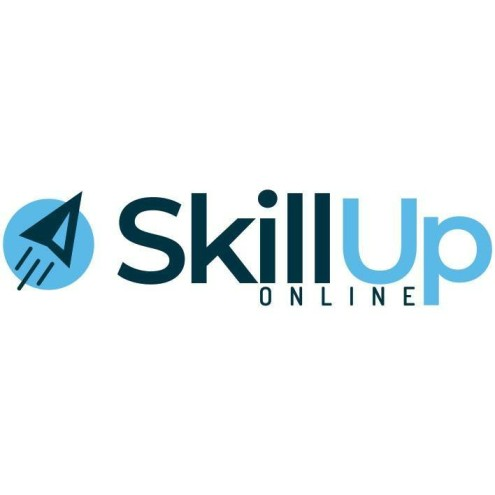


 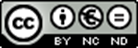

<h3> Esta obra está sujeta a una licencia de Reconocimiento-NoComercial-SinObraDerivada. 3.0 España de Creative Commons. </h3>

# **Detección de fraudes con tarjetas de crédito**

Enlace al dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

### Importa las bibliotecas necesarias

In [1]:
# Importa la bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importa y organiza el dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mlg-ulb/creditcardfraud/versions/3


In [4]:
# Organizar los datos en un dataframe
filepath = "/content/drive/MyDrive/IBM/CursoIA/creditcard.csv"
data = pd.read_csv(filepath, header=0)
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0



<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Comienza por importar la biblioteca de pandas: import pandas as pd.
    
Utiliza la función read_csv() para cargar el archivo CSV en un dataframe de pandas. Especifica la ruta en los paréntesis, por ejemplo: pd.read_csv("ruta_al_archivo.csv").
    
Asigna al dataframe resultante al nombre de una variable, por ejemplo: data = pd.read_csv("ruta_al_archivo.csv").
    
Utiliza el método head() sobre el dataframe para mostrar las primeras 10 filas, por ejemplo: data.head(10).
    
Asegúrate de reemplazar "ruta_al_archivo.csv" con la ruta real a tu archivo y el nombre de tu archivo CSV..

```



</details>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Limpia los datos

a. Valores perdidos

In [6]:
#Escribe tu código aquí
valores_nulos = data.isnull().sum()
print(valores_nulos)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```

Utiliza el nombre de la variable del dataframe seguido del método isnull() para crear un dataframe booleano donde «verdadero» indique un valor nulo y «falso» indique un valor no nulo.

Utiliza el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de valores nulos) en cada columna.

Si unes ambos pasos, el código se verá así: data.isnull().sum()


Este código asume que el nombre del datafrme de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

b. Datos duplicados

In [7]:
#Escribe tu código aquí
# Contar las filas duplicadas
filas_duplicadas = data.duplicated().sum()
print("Número de filas duplicadas:", filas_duplicadas)

Número de filas duplicadas: 1081


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Usa el nombre de la variable del dataframe seguido del método duplicated() para crear un dataframe booleano donde «verdadero» indicará una fila duplicada y «falso» una fila no duplicada.

Usa el método sum() en el dataframe booleano para contar la cantidad de valores verdaderos (i.e., la cantidad de filas duplicadas).

Si unes ambos pasos, el código se verá así: data.duplicated().sum()

Este código asume que el nombre del dataframe de pandas es «data». Si tu dataframe tiene un nombre diferente, reemplaza «data» con el nombre correcto de la variable.

```



</details>

**Qué hacer con las filas duplicadas**

La decisión de qué hacer con las filas duplicadas depende del contexto de tus datos y del objetivo de tu análisis.

1. Eliminar las filas duplicadas:

`data = data.drop_duplicates()`


2. Mantener todas las filas:

Si cada fila representa una observación única, incluso si los valores son idénticos, se pueden mantener todas las filas. Esto podría ser útil porque los duplicados tienen un significado específico en tu contexto. Pueden ser operaciones que se han repetido.

3. Investigar las duplicadas:

Antes de tomar una decisión, es recomendable investigar por qué existen duplicados:

*   Errores en la recopilación de datos: Si los duplicados son errores, pueden ser eliminarlos.
*   Múltiples observaciones de la misma entidad: Si los duplicados representan múltiples observaciones de la misma entidad (por ejemplo, múltiples registros de un mismo cliente), puedes agruparlos y calcular estadísticas agregadas.
*   Datos duplicados intencionales: Si los duplicados son intencionales (por ejemplo, para fines de validación cruzada), puedes mantenerlos.

4. Marcar las filas duplicadas:

Si se quiere conservar toda la información, pero se necesita identificar las filas duplicadas para análisis posteriores, se puede crear una nueva columna que indique si una fila es duplicada o no:

`data['is_duplicate'] = data.duplicated()`



Impacto en el análisis:

Evalúa cómo la eliminación de duplicados podría afectar tus resultados. Si esta construyendo un modelo de machine learnin y la eliminación de duplicados  reduciría el tamaño de tu conjunto de entrenamiento minimamente y no va afectar el rendimiento del modelo.

In [8]:
# total filas duplicadas
total_filas = len(data)
total_filas

284807

In [9]:
# Porcentaje de filas duplicadas
porcentaje_duplicados = (filas_duplicadas / total_filas) * 100
print("Porcentaje de filas duplicadas:", porcentaje_duplicados, "%")

Porcentaje de filas duplicadas: 0.379555277784605 %


**En el caso de eliminar duplicadas:**

In [10]:
#data = data.drop_duplicates()
#data

### Analiza los datos

Pregunta 1: ¿Cuál es el porcentaje de transacciones fraudulentas en el dataset?



In [11]:
# Calcula el porcentaje de transacciones fraudulentas
# Contar las transacciones fraudulentas
# Filtra el DataFrame para obtener solo las filas donde la columna 'Class' es igual a 1.
# shape[0]: Devuelve el número de filas (transacciones) en el DataFrame filtrado.
num_transacciones_fraudulentas = data[data['Class'] == 1].shape[0]
num_transacciones_fraudulentas



492

In [12]:
# Contar el total de transacciones
total_transacciones = data.shape[0]
total_transacciones

284807

In [13]:
# Calcular el porcentaje de transacciones fraudulentas
porcentaje_fraude = (num_transacciones_fraudulentas / total_transacciones) * 100


# Muestra el porcentaje de transacciones fraudulentas
print("Porcentaje de transacciones fraudulentas:", porcentaje_fraude, "%")

Porcentaje de transacciones fraudulentas: 0.1727485630620034 %


La mayoría de las transacciones no son fraudulentas. Si usamos este marco de datos como base para nuestros modelos predictivos y análisis, podríamos obtener muchos errores y nuestros algoritmos probablemente se sobreajustarán, ya que "asumirán" que la mayoría de las transacciones no son fraude. Esta fuera de estudio en este caso se ajusta el entrenamiento a las especificaciones dadas.

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el porcentaje de transacciones fraudulentas, debes contar la cantidad de transacciones fraudulentas (aquellas donde «Class» es igual a 1) y dividirla por le número total de transacciones en el dataset. Después, multiplica el resultado por 100 para obtener el porcentaje.
</details>

Pregunta 2: ¿Cuál es el importe medio de las transacciones fraudulentas?



In [14]:
# Calcula el importe medio de las transacciones fraudulentas
# Filtrar las transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]

# Calcular el importe medio de las transacciones fraudulentas
importe_medio_fraude = transacciones_fraudulentas['Amount'].mean()

# Muestra el importe medio de las transacciones fraudulentas
print(f"El importe medio de las transacciones fraudulentas es: {importe_medio_fraude:.6f}")

El importe medio de las transacciones fraudulentas es: 122.211321


<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para calcular el importe medio de las tansacciones fraudulentas, primero deberás filtrar el dataset para que contenga solamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, calcular la media de la columna «Amount» de los datos filtrados.
</details>

### Visualiza los datos


Pregunta 1: ¿Cuántas transacciones fraudulentas hay en comparación con las no fraudulentas? (Utiliza un gráfico de barras)

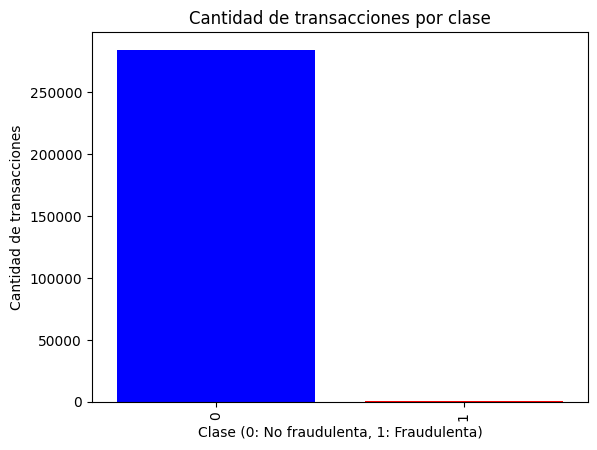

In [15]:
# Cuenta el número de transacciones fraudulentas y no fraudulentes
conteo_clases = data['Class'].value_counts()

# Muestra la distribución de las traducciones fraudulentas con respecto de las no fraudulentas
conteo_clases.plot(kind='bar')

# Crear una lista de colores
colores = ['blue', 'red']

# Asignar los colores a cada barra
plt.bar(conteo_clases.index, conteo_clases.values, color=colores)

# Agregar título y etiquetas a los ejes
plt.title('Cantidad de transacciones por clase')
plt.xlabel('Clase (0: No fraudulenta, 1: Fraudulenta)')
plt.ylabel('Cantidad de transacciones')

# Mostrar el gráfico
plt.show()

Distribuciones: Al ver las distribuciones podemos tener una idea de que están sesgadas.

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>

    Para crear un gráfico de barras que muestre la cantidad de transacciones fraudulentas y no fraudulentas, deberás contar las veces que ocurre cada clase (fraude y no fraude) según la información de la columna «Class» y después representar estos recuentos en un gráfico de barras.
</details>

Pregunta 2: ¿Cuál es la distribución de los importes de las transacciones fraudulentas? (Utiliza un histograma)


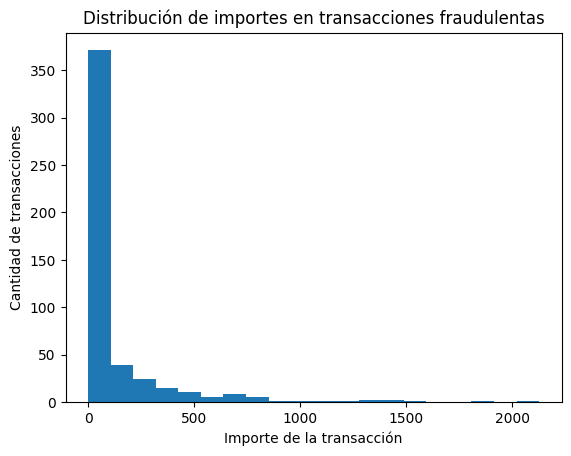

In [16]:
# Separa los datos de transacciones fraudulentas
# Filtrar las transacciones fraudulentas
transacciones_fraudulentas = data[data['Class'] == 1]

# Muestra la distribución de los importes de las transacciones fraudulentas
# Crear el histograma
plt.hist(transacciones_fraudulentas['Amount'], bins=20)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de importes en transacciones fraudulentas')
plt.xlabel('Importe de la transacción')
plt.ylabel('Cantidad de transacciones')

# Mostrar el gráfico
plt.show()

<details>
  <summary><b>Haz clic aquí para obtener una pista</b></summary>
    
    Para visualizar la distribución de los importes de las transacciones fraudulentas, deberás filtrar el dataset para que contenga únicamente las transacciones fraudulentas (aquellas donde «Class» es igual a 1) y, después, usar un histograma para representar la distribución de los valores de la columna «Amount» de los datos filtrados.
</details>

## Desarrollo y evaluación de modelos

### Separa del dataset

In [17]:
# Separa los datos de entrenamiento y evaluación
from sklearn.model_selection import train_test_split

# Separar las características (X) de la variable objetivo (y)
X = data.drop('Class', axis=1)  # Todas las columnas excepto 'Class'
y = data['Class']

# Dividir los datos en conjuntos de entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma del conjunto de entrenamiento:", X_train.shape, y_train.shape)
print("Forma del conjunto de evaluación:", X_test.shape, y_test.shape)

Forma del conjunto de entrenamiento: (227845, 30) (227845,)
Forma del conjunto de evaluación: (56962, 30) (56962,)


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Una vez que tegas este dataset, puedes utilizar la biblioteca scikit-learn para separar los datos en grupos de entrenamiento y de evaluación con la función train_test_split().

Primero, puedes crear un dataframe de pandas «X» con todas las columnas excepto la columna «Class». Puedes crear una serie de pandas «y» solamente con la clumna «Class» column.

A continuación, pueder usar la función train_test_split() para separar los datos en grupos de entrenamiento y de evaluación. Puedes pasar las variables X e Y como argumentos junto con el argumento test_size para especificar el porcentaje del dataset que se deberá asignar al grupo de evaluación (en este caso, el 20 %). También puedes utilizar el argumento random_state para determinar un valor fijo de tal manera que, cada vez que se ejecute el código, se produzca la misma división.

La función train_test_split() devuelve cuatro variables: X_train, X_test, y_train y y_test. X_train e y_train representan el grupo de entrenamiento, minetras que X_test e y_test representan el grupo de evaluación. Puedes utilizar estas variable para entrenar y evaluar tus modelos de aprendizaje automático.

Ten en cuenta que es importante dividir los datos en grupos de entrenamiento y de evaluación para evitar el sobreajuste y permitir que se evalúe el rendimiento del modelo con datos que desconoce.

```



</details>

### Crea y evalúa los modelos

1. Importar las bibliotecas.
2. Crear una instancia del clasificador: Creamos una instancia de RandomForestClassifier y configuramos los hiperparámetros max_depth (profundidad máxima de los árboles) y random_state (semilla para la reproducibilidad).
3. Entrenar el modelo: Utilizamos el método fit() para entrenar el modelo con los datos de entrenamiento X_train e y_train.
4. Hacer predicciones: Utilizamos el método predict() para hacer predicciones sobre los datos de prueba X_test y almacenamos las predicciones en y_pred.
5. Evaluar el modelo:
*   classification_report: Genera un informe detallado con métricas como precisión, recall, F1-score para cada clase.
*   accuracy_score: Calcula la precisión general del modelo, es decir, la proporción de predicciones correctas.
6. Imprimir resultados: Imprimimos el informe de clasificación y la precisión del modelo en un formato legible.

In [18]:
#Escribe tu código aquí
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Crear una instancia del clasificador Random Forest
clf = RandomForestClassifier(max_depth=150, random_state=42)

# Entrenar el modelo
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=150, random_state=42)

In [19]:
# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

# Evaluar el modelo
print(classification_report(y_test, y_pred))

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo:", accuracy * 100, "%")

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

Precisión del modelo: 99.95611109160492 %


<details><summary><b>Haz clic aquí para obtener una pista</b></summary>



```
Debes haber importado las bibliotecas y clases necesarias, tales como la clase RandomForestClassifier de scikit-learn y las funciones classification_report() y accuracy_score() functions del módulo sklearn.metrics.

Una vez hayas hecho esto, podrás crear una instancia de la clase RandomForestClassifier configurando los hiperparámetros max_depth y random_state en 150 y 42, respectivamente. Puedes utilizar el método .fit() para entrenar el modelo con los datos de entrenamiento.

A continuación, puedes utilizar el modelo entrenado para hacer predicciones sobre los datos de evaluación con el método .predict(). Puedes almacenar estas predicciones en una variable llamada y_pred.

Después, puedes utilizar la función classification_report() para mostrar en la pantalla un resumen del rendimiento del modelo con los datos de entrenamiento. Esto incluirá métricos tales como la precisión (precission), la exhaustividad (recall) y la puntuación F1 (f1-score) para cada una de las clases (en este caso, si una transacción es fraudulenta o normal). También puedes utilizar la función accuracy_score() para calcular la exactitud general del modelo con los datos de evaluación.

Finalmente, podrás mostrar la exactitud el modelo en forma de porcentaje; utiliza el operador *100 para multiplicar la puntuación de exactitud por 100.

```



</details>

**Análisis de las Métricas del Modelo**

Las métricas obtenidas proporcionan una visión bastante clara del rendimiento del modelo en la detección de transacciones fraudulentas. Vamos a analizarlas en detalle, teniendo en cuenta el contexto del problema (bajo porcentaje de transacciones fraudulentas):

**Interpretación de las Métricas**

1. Precisión (precision):

Clase 0 (No fraudulenta): Una precisión de 1.00 indica que todas las transacciones clasificadas como no fraudulentas realmente lo eran. Esto es muy bueno y sugiere que el modelo es muy bueno en identificar transacciones legítimas.

Clase 1 (Fraudulenta): Una precisión de 0.97 significa que el 97% de las transacciones clasificadas como fraudulentas realmente lo eran. Aunque es un buen valor, indica que hay un pequeño margen de error en la clasificación de las transacciones fraudulentas.

2. Recall (exhaustividad):

Clase 0: Un recall de 1.00 significa que el modelo identificó todas las transacciones no fraudulentas.

Clase 1: Un recall de 0.77 indica que el modelo solo identificó el 77% de las transacciones fraudulentas. Esto sugiere que el modelo podría estar pasando por alto algunas transacciones fraudulentas.

3. F1-score:

El F1-score es la media armónica de precisión y recall, proporcionando un equilibrio entre ambos. Un F1-score de 0.86 para la clase 1 indica un buen rendimiento general, pero sugiere que aún hay margen de mejora en la detección de todas las transacciones fraudulentas.

4. Accuracy:

La precisión general del modelo es extremadamente alta (99.95%). Sin embargo, debido al **desbalance de clases** (muy pocas transacciones fraudulentas), esta métrica puede ser engañosa. Es decir, el modelo podría estar clasificando casi todas las transacciones como no fraudulentas y aún así obtener una alta precisión.



**Conclusiones y Consideraciones**

1. Desbalance de clases: El principal desafío en este tipo de problemas es el desbalance de clases. El modelo está muy bien en identificar transacciones legítimas, pero tiene dificultades para identificar las fraudulentas, que son mucho menos frecuentes.

2. Recall como métrica clave: En este contexto, el recall es una métrica más importante que la precisión. Queremos asegurarnos de identificar la mayor cantidad posible de transacciones fraudulentas, incluso si eso significa algunos falsos positivos.

**Posible mejora:**

Sobremuestreo o submuestreo: Aumentar el número de ejemplos de la clase minoritaria (fraudulenta) o reducir el número de ejemplos de la clase mayoritaria (no fraudulenta) para equilibrar el dataset.

En resumen, el modelo presenta un excelente rendimiento en la identificación de transacciones legítimas, pero podría mejorar en la detección de transacciones fraudulentas. Dada la importancia de identificar todas las transacciones fraudulentas, es crucial enfocarse en mejorar el recall para la clase minoritaria.



# **Extra:**

In [20]:
# Incluimos dos nuevas columas'
data['is_duplicate'] = data.duplicated()
data['is_fraud'] = data['Class'] == 1
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,is_duplicate,is_fraud
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,False,False
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,False,False
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,False,False
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,False,False
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,False,False
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,False,False
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,False,False
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,False,False


**Examinar las trasaciones fraudulentas y duplicadas:**

In [21]:
# Filtrando por transacciones fraudulentas y duplicadas
fraud_dup_counts = ((data['is_fraud'] == True) & (data['is_duplicate'] == True)).value_counts()
fraud_dup_counts

,count
False,284788
True,19


**Hay 19 transaciones que coinciden entre duplicadas y fraudulentas.**

In [22]:
tabla= pd.crosstab(data['is_duplicate'], data['is_fraud'])
tabla

is_fraud,False,True
is_duplicate,,
False,283253,473
True,1062,19


In [23]:
num_transacciones_fraudulentas

492

In [24]:
filas_duplicadas

1081

In [25]:
# Filtrando por transacciones fraudulentas y duplicadas
fraud_dup_counts2 = ((data['is_fraud'] == True) & (data['is_duplicate'] == True)).sum()
fraud_dup_counts2

19

In [26]:
# Calcular el porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de transacciones fraudulentas
porcentaje_fraude2 = ( fraud_dup_counts2 / num_transacciones_fraudulentas) * 100

# Muestra el porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de transacciones fraudulentas
print("Porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de transacciones fraudulentas:", porcentaje_fraude2, "%")

Porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de transacciones fraudulentas: 3.861788617886179 %


In [27]:
# Calcular el porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de filas duplicadas
porcentaje_fraude3 = (fraud_dup_counts2  / filas_duplicadas) * 100

# Muestra el porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de filas duplicadas
print("Porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de filas duplicadas:", porcentaje_fraude3, "%")

Porcentaje de transacciones duplicadas/fraudulentas con respecto al numero de filas duplicadas: 1.757631822386679 %


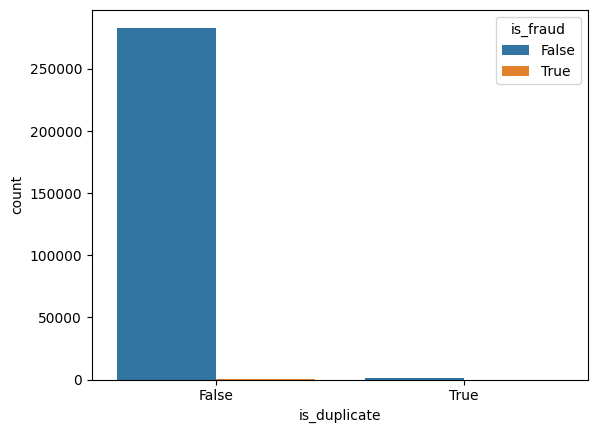

In [28]:
pd.crosstab(data['is_duplicate'], data['is_fraud'])
sns.countplot(x='is_duplicate', hue='is_fraud', data=data)
plt.show()
